# Declaration of Originality

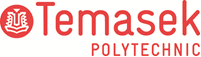

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : NG FENG KANG MALCOLM (2401779J)
* Tutorial Group                :  TC16
* Tutor						    :  MR EMILE SEBESTIAN
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Business Understanding

Mental health issues such as depression are getting increasingly common among students and can negatively affect their academic performance, social relationships, and overall well-being. However, many students who are experiencing mental health issues are not identified early enough to receive appropriate support. Without support for their mental health, dangerous issues may arise. 

The purpose of this data science project is to analyze students’ mental health through survey data to understand the prevalence and severity of depression and anxiety among students and to identify factors that may be associated with higher mental health risk.
Specifically, this project aims to:

1. Determine the distribution of depression (PHQ-9) among students, explore relationships between mental health scores and student-related factors such as academic workload, sleep patterns, and demographics as well as support early identification of students who may be at moderate to severe mental health risk. 

2. The insights gained from this analysis can help educational institutions and counselors design targeted mental health interventions, allocate support resources effectively, and promote student well-being by predicting the depression scores of students.


# 2. Data Understanding

## 2.1 Load dataset

In [2]:
df = pd.read_csv('students_mental_health_survey.csv') # Load the data into a DataFrame with the use of pandas library. 
df # Display the first few rows of the DataFrame to understand its structure.

,ID,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,...,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,1,25,Others,Male,3.56,3,3,2,Good,Moderate,...,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,2,24,Engineering,Female,2.44,0,3,0,Average,Low,...,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,3,19,Business,Female,3.74,4,0,3,Good,Low,...,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,4,19,Computer Science,Male,3.65,2,1,0,Average,Low,...,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,5,18,Business,Male,3.40,3,3,4,Good,Low,...,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,7018,20,Law,Female,3.69,3,1,5,Good,Low,...,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,7019,24,Medical,Female,3.73,3,4,1,Good,Moderate,...,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,7020,26,Others,Male,3.65,4,5,1,Good,High,...,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,7021,24,Medical,Male,3.65,4,3,4,Average,High,...,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus


#### Comments: This dataset contains the survey responses related to student's mental health. As seen from the dataset, there are 7022 rows and 21 columns. 

## 2.2 Summary Statistics

In [3]:
df.dtypes # Used to check the data types of each column in the DataFrame.

ID                               int64
Age                              int64
Course                          object
Gender                          object
CGPA                           float64
Stress_Level                     int64
Depression_Score                 int64
Anxiety_Score                    int64
Sleep_Quality                   object
Physical_Activity               object
Diet_Quality                    object
Social_Support                  object
Relationship_Status             object
Substance_Use                   object
Counseling_Service_Use          object
Family_History                  object
Chronic_Illness                 object
Financial_Stress                 int64
Extracurricular_Involvement     object
Semester_Credit_Load             int64
Residence_Type                  object
dtype: object

#### Comments: As seen from the table, there are datatypes (floats, integers & objects). This means that there are both categorial & numeric data/features. 

In [4]:
df.info() # Used to get a concise summary of the DataFrame, where information includes the data types and non-null counts for each column. 
## Additionally, we can see the number of features which in this case is 20 features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7022 non-null   int64  
 1   Age                          7022 non-null   int64  
 2   Course                       7022 non-null   object 
 3   Gender                       7022 non-null   object 
 4   CGPA                         7010 non-null   float64
 5   Stress_Level                 7022 non-null   int64  
 6   Depression_Score             7022 non-null   int64  
 7   Anxiety_Score                7022 non-null   int64  
 8   Sleep_Quality                7022 non-null   object 
 9   Physical_Activity            7022 non-null   object 
 10  Diet_Quality                 7022 non-null   object 
 11  Social_Support               7022 non-null   object 
 12  Relationship_Status          7022 non-null   object 
 13  Substance_Use     

#### Comments: As seen from the statistics, there are datatypes (floats, integers & objects), information already derived from df.dtypes. As for non-null counts, most columns contain all non-null values (7022 non-null values) with the exception of CGPA (7010 non-null values) & Substance Use (7007 non-null values). 

In [5]:
df.describe(include='all') # This allows us to get summary statistics and data distribution for all columns in the dataset based on mean, median, mode, standard deviation, minimum, maximum, and percentiles.

,ID,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,...,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
count,7022.000000,7022.000000,7022,7022,7010.00000,7022.000000,7022.000000,7022.000000,7022,7022,...,7022,7022,7007,7022,7022,7022,7022.000000,7022,7022.000000,7022
unique,NaN,NaN,6,2,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,2,2,NaN,3,NaN,3
top,NaN,NaN,Medical,Male,NaN,NaN,NaN,NaN,Good,Moderate,...,Moderate,Single,Never,Never,No,No,NaN,Moderate,NaN,On-Campus
freq,NaN,NaN,2105,3547,NaN,NaN,NaN,NaN,3589,3521,...,3470,3574,5903,4263,4866,6678,NaN,3440,NaN,2815
mean,3511.500000,23.003418,NaN,NaN,3.49127,2.427941,2.254486,2.300484,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.453005,NaN,22.010538,NaN
std,2027.221128,3.853978,NaN,NaN,0.28742,1.638408,1.625193,1.624305,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.708995,NaN,4.358380,NaN
min,1.000000,18.000000,NaN,NaN,2.44000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,15.000000,NaN
25%,1756.250000,20.000000,NaN,NaN,3.29000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,18.000000,NaN
50%,3511.500000,22.000000,NaN,NaN,3.50000,2.000000,2.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,22.000000,NaN
75%,5266.750000,25.000000,NaN,NaN,3.70000,4.000000,3.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,26.000000,NaN


#### Comments: For categorial features, there are little insights to be derived from their numeric statistics as they cannot be computed. We can visualize some of these aggregations with box plots later. 

In [6]:
df.isna().sum() ## Used to check for missing values in each column. 

ID                              0
Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

#### Comments: As noticed previously when using df.info(), some columns have (null) missing values. There are missing values for CGPA & Substance Use of 12 & 15 respectively. With this information, we will manage and clean them later.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data
#### When trying to understand the distrubution of data, we must make use of data visualizations such as histograms, bar charts, box plots, etc. The library that we are using are matplotlib.pyplot and seaborn. 

### 2.3.1.1 Understanding distribution of target
#### In this section, we are currently focusing on our target variable which is Depression Score, a numeric variable. 

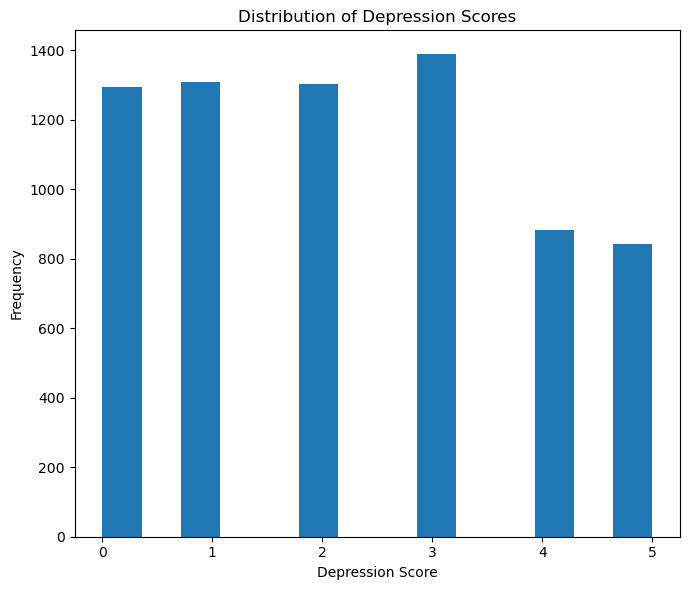

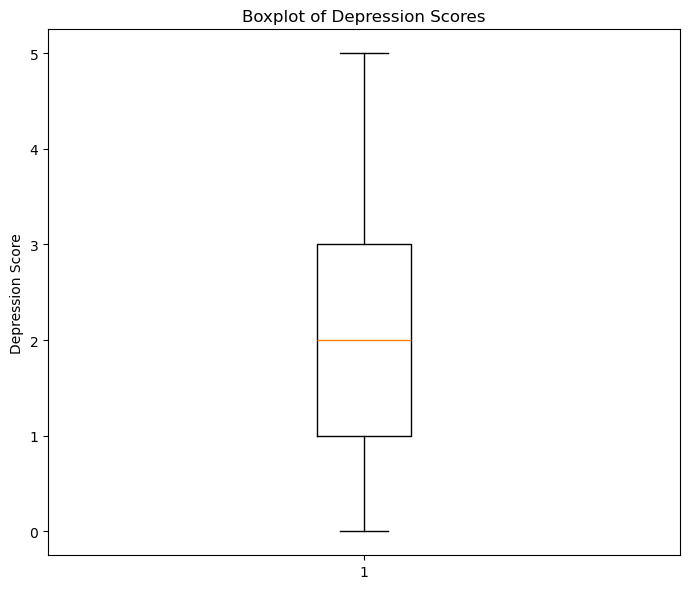

In [7]:
import matplotlib.pyplot as plt

col_y = 'Depression_Score'
plt.figure(figsize=(7, 6))  # Create a standalone figure for the histogram
plt.hist(df[col_y], bins=14)  # Plotting a histogram to visualize the distribution of depression scores. I set the number of bins to 14 for better granularity.

# Adding titles and labels for clarity of the histogram.
plt.title('Distribution of Depression Scores')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the histogram


plt.figure(figsize=(7, 6))  # Create a standalone figure for the boxplot

plt.boxplot(df[col_y], vert=True)  # Plotting a boxplot to visualize the spread and identify any outliers
# in the depression scores.

# Adding titles and labels for clarity of the box plot.
plt.title('Boxplot of Depression Scores')
plt.ylabel('Depression Score')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the boxplot


#### Analysis: In the histogram generated, we can see that depression scores range from 0 to 5 with most of the frequency ranging from 0 to 3. Score 3 appears the most frequent while higher scores such as 4 & 5 appear less often, meaning that fewer individuals report severe levels of depression. Mostly, people have an average depression score. Overall, the histogram is slightly right-skewed as the distribution of frequency gradually decreases towards the higher scores. 

#### The boxplot generated further supports this observement. The median depression score is approximately 2, suggesting that half of the individuals have a depression score of 2 or below. The interquartile range (IQR) spans roughly from 1 to 3 (Q1, Q3), indicating moderate variability in depression scores among the population. The whiskers extend from 0 to 5, which are the minimum and maximum possible values, and no outliers are detected, implying that all observations fall within the expected scoring range. 

#### The data distribution indicates that depression is present but generally not severe within the respondents (students) in the dataset. However, the concentration of scores around the mid-range highlights the importance of early intervention and monitoring, as a substantial portion of individuals may be at risk of developing higher levels of depression if stressors increase. Additionally, the limited spread of values may reduce the strength of correlations between depression and other variables, as restricted variability can attenuate linear relationships.



### 2.3.1.2 Understanding distribution of features

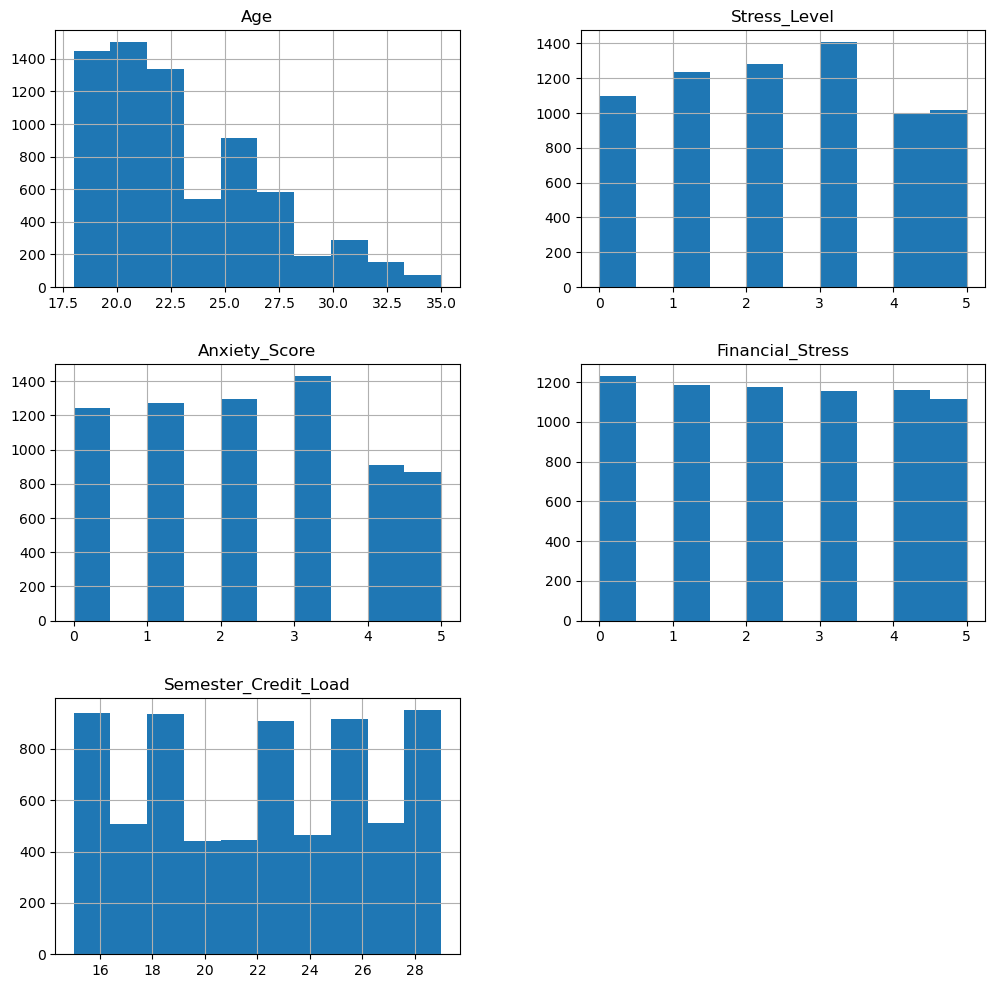

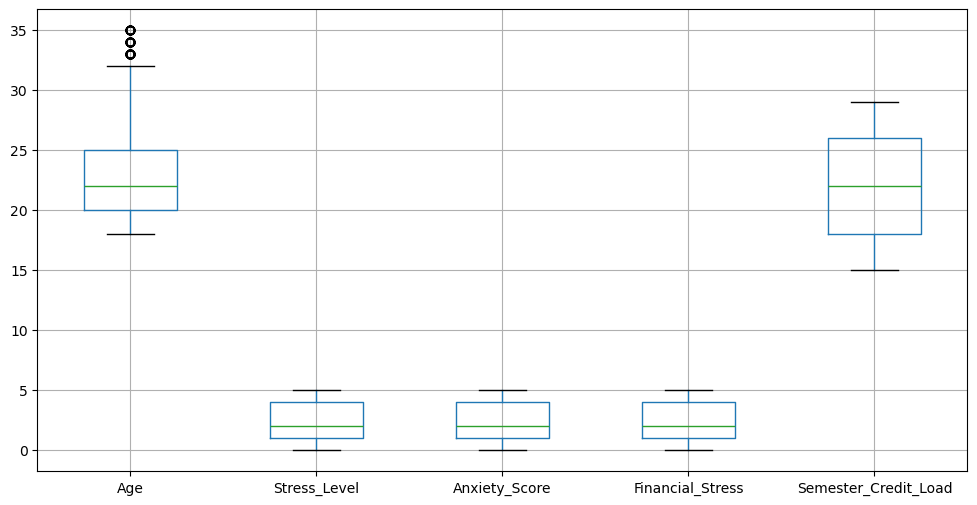

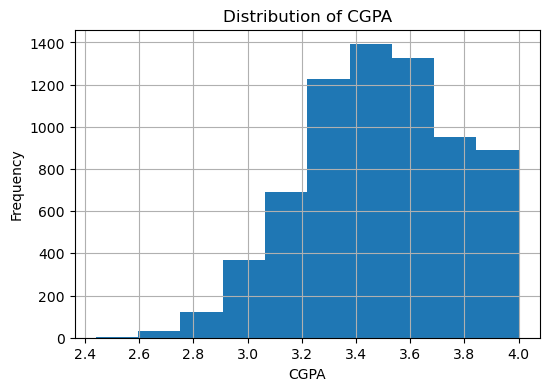

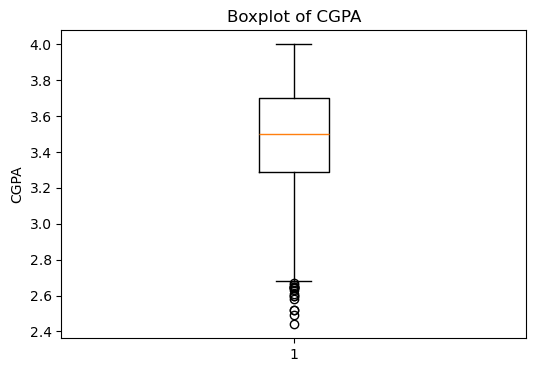

In [8]:
df = df.drop(columns=['ID']) # Storing the DataFrame after dropping the 'ID' column as it is not useful for analysis.

features = df.drop(columns=[col_y, 'CGPA']) # Dropping target variable and CGPA from features for visualization due to scale issue with CGPA.
num_features = features.select_dtypes(include='number') # Selecting only numerical features for visualization.
col_cgpa = df['CGPA'] # Storing CGPA column separately for individual visualization.

# Plotting histograms for all numerical features to visualize their distributions.
num_features.hist(figsize=(12, 12)) 
plt.show()

plt.figure(figsize=(12, 6))
features.boxplot()
plt.show()

# Seperate CGPA histogram due to scale issues
col_cgpa.hist(figsize=(6,4))
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# Seperate CGPA boxplot due to scale issues
plt.figure(figsize=(6,4))
plt.boxplot(col_cgpa.dropna(), vert=True)
plt.title('Boxplot of CGPA')
plt.ylabel('CGPA')
plt.show()


#### Analysis: These are the histograms & box plots of all numeric features. They include: Age, Stress Level, Anxiety Score, Financial Stress, Semester Credit Load, and CGPA. These features revolve around students’ demographic characteristics, academic workload, mental well-being, and academic performance.

#### 1. Age:
#### As seen from the histogram, most students fall in the 18–25 age range, with a strong concentration around 20–22. The distribution is right-skewed, meaning there are fewer older students. In the boxplot, a few outliers can be seen around 30–35 where 35 is the maximum age. These outliers could suggest more mature students or later enrollments to the school. The median age is around 22, indicating a fairly young sample overall. The dataset mainly represents traditional undergraduate students, with a small presence of older learners.

#### 2. Stress Level:
#### As seen from the histogram, the values range from 0 to 5. The stress levels are fairly evenly distributed, with a slight peak around levels 2–3. The minimum and maximum values (very low stress at 0 and very high stress at 5) are less common compared to other levels. In the boxplot, the median stress level is approximately 2, and no outliers are observed. This suggests that most students experience moderate stress throughout their academic years rather than extreme levels, although stress still remains consistently present across the population.

#### 3. Anxiety Score:
#### From the histogram, anxiety scores range from 0 to 5 and show a relatively balanced distribution, with most values clustered between 1 and 3. Scores at the extreme ends are less frequent, indicating that very low or very high anxiety levels are less common. The boxplot shows a median anxiety score of approximately 2, with a moderate interquartile range. No significant outliers are present, suggesting that anxiety levels vary among students but generally remain within a typical range.

#### 4. Financial Stress:
#### The histogram for financial stress shows values distributed across the full range from 0 to 5, with a noticeable concentration around the mid-range values. Higher financial stress levels appear slightly more frequent than the lowest levels, indicating that financial pressure is a common concern among students. The boxplot reveals a median financial stress score of around 2, with a moderate spread and no extreme outliers. This suggests that while financial stress is prevalent, it does not reach extreme levels for most individuals.

#### 5. Semester Credit Load:
#### As observed in the histogram, semester credit load ranges approximately from 15 to 29 credits. Most students are concentrated between 18 and 22 credits, which is consistent with a standard full-time academic workload. The boxplot indicates a median credit load of around 22 credits, with a relatively wide spread, suggesting variability in academic intensity. A small number of students taking heavier credit loads may be at greater risk of increased stress and academic pressure.

#### 6. CGPA:
#### The histogram of CGPA shows values ranging from approximately 2.4 to 4.0, with most students concentrated between 3.2 and 3.8. The distribution is slightly left-skewed, implying a higher concentration of students with stronger academic performance. The boxplot shows a median CGPA of around 3.5, with a few lower-end outliers. Overall, this suggests that academic performance in the dataset is generally strong, although a small subset of students may be academically at risk.

### Further Analysis Of Numeric Features With Target Variable

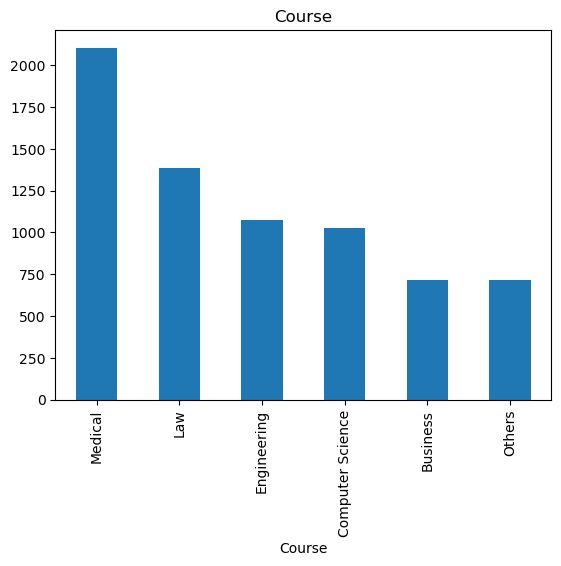

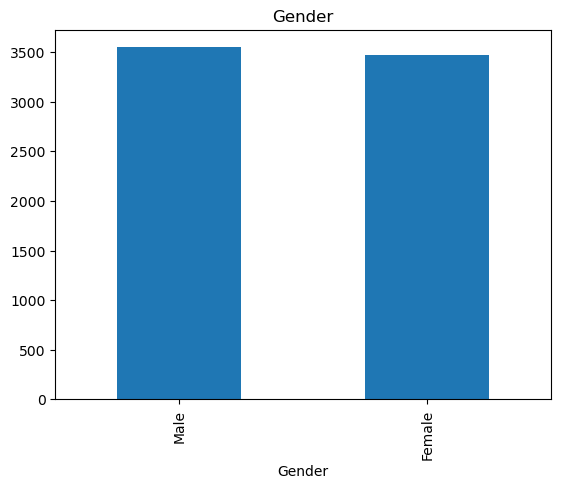

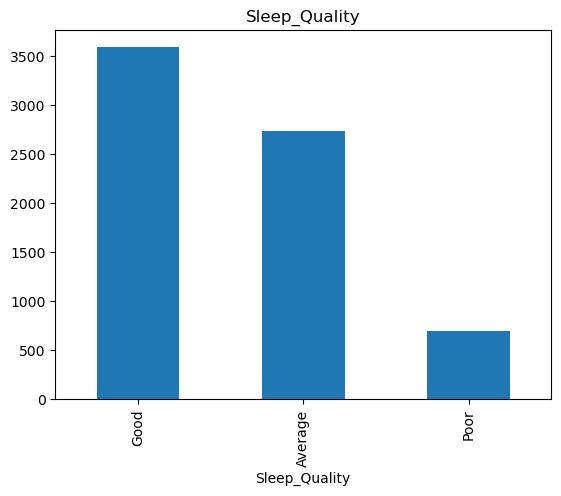

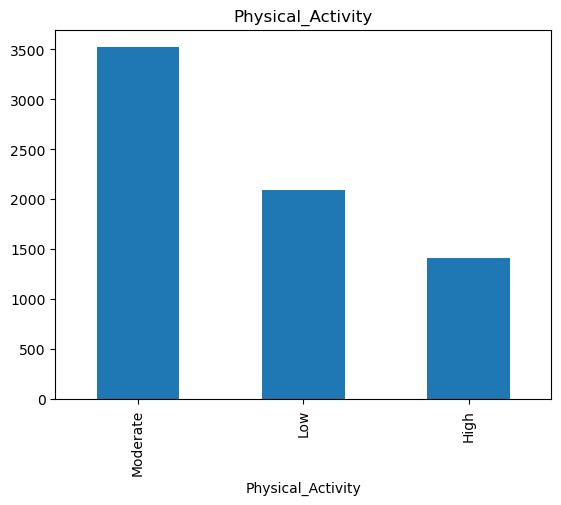

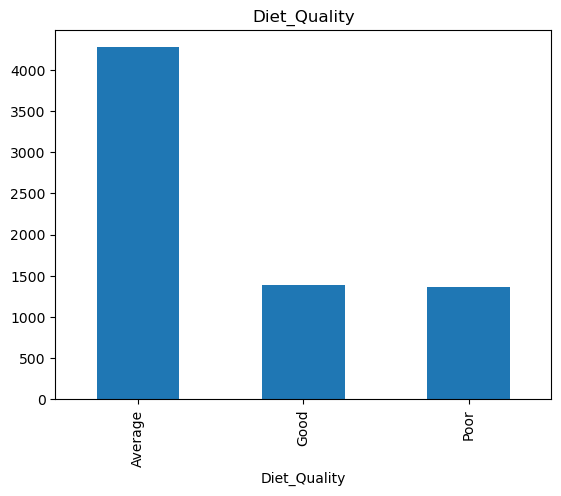

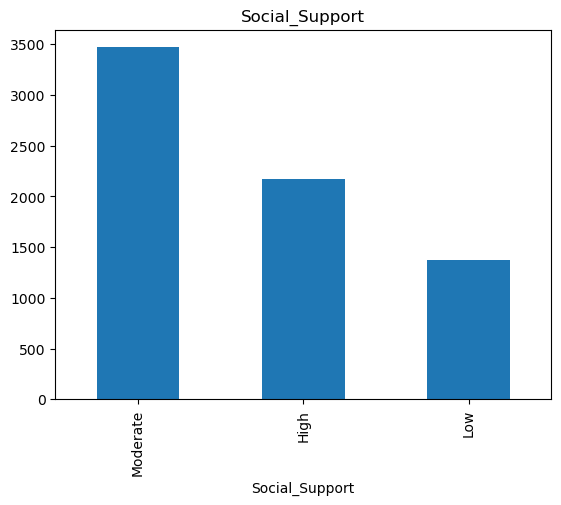

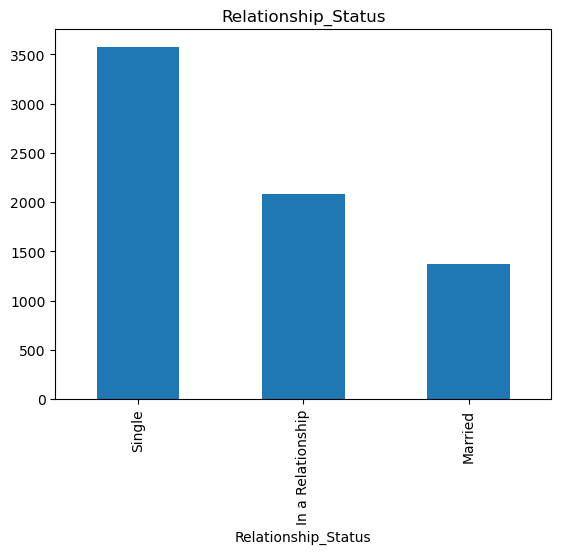

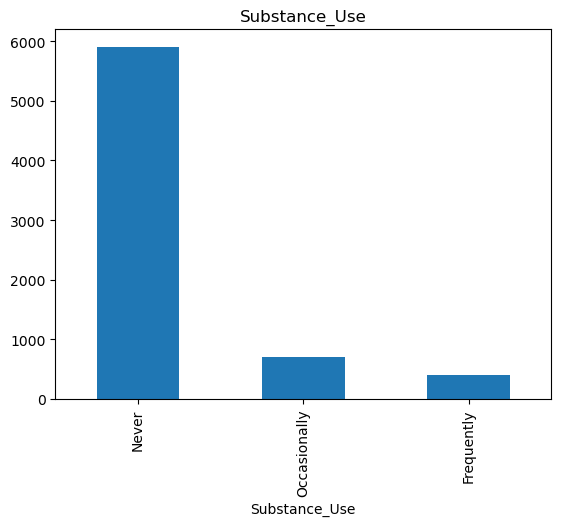

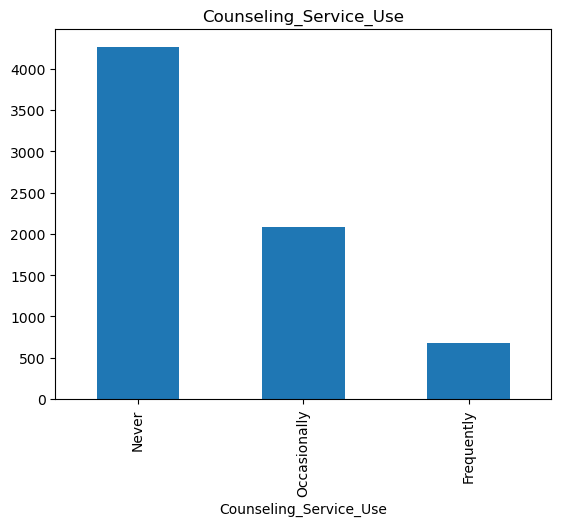

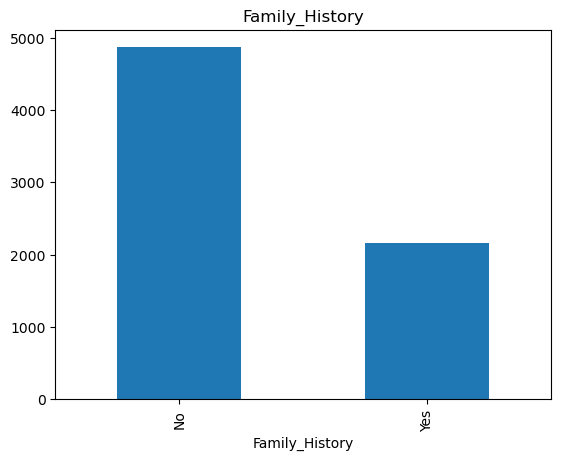

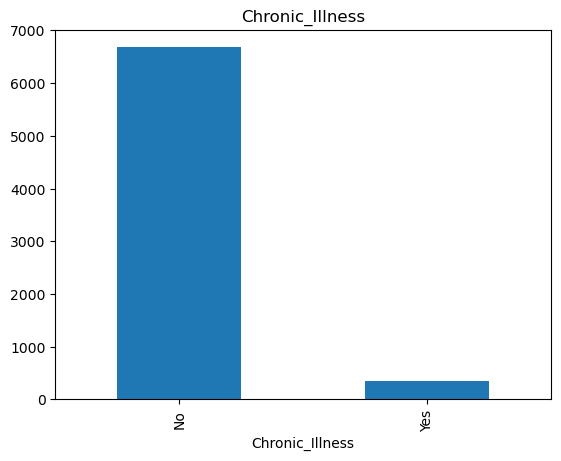

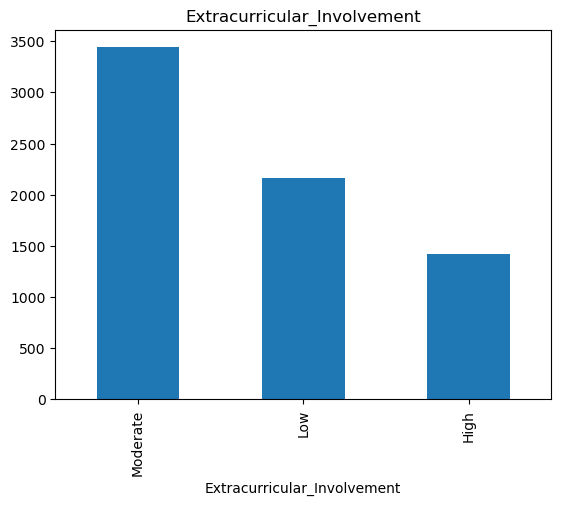

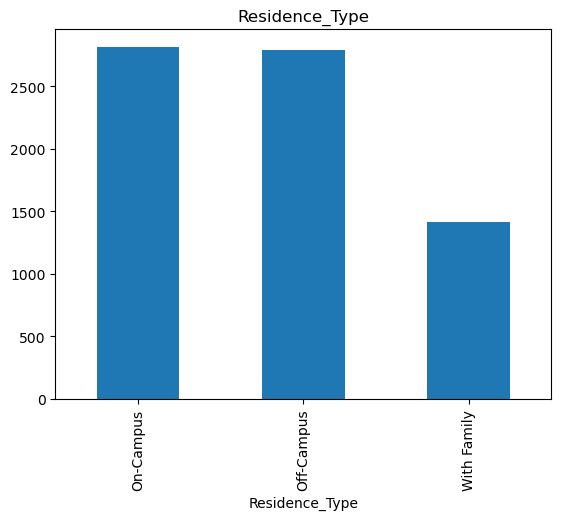

In [9]:
cat_features = df.select_dtypes(include='object')

for col in cat_features:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

### Analysis
#### These are the barcharts of all categorial features. They include: Course, Gender, Sleep Quality, Physical Activity, Diet Quality, Social Support, Relationship Status, Substance Use, Counseling Service Use, Family History of Mental Health Issues, Chronic Illness, Extracurricular Involvement, Residence Type. These features revolve around lifestyle factors, social context, and health-related characteristics. 

#### 1. Course
#### As seen from the bar chart, medical students form the largest group out of all categories. However, Law, Engineering, and Computer Science follow closely in terms of frequency. Categories such as Business and “Others” represent smaller proportions. Others represent smaller proportions of school courses that could include arts, social sciences, education, and other specialised or less common programmes that are not explicitly listed in the main categories. This indicates that the dataset is skewed toward academically demanding disciplines, particularly medical and law-related fields. These courses are traditionally associated with heavier workloads, higher expectations, and competitive environments. As a result, stress, anxiety, and depression levels observed in the dataset may be partially influenced by the academic rigor of these programs. Course type may therefore act as a confounding variable when analyzing mental health outcomes.

#### 2. Gender
#### As seen from the bar chart, male and female students are almost evenly represented. This balanced gender distribution enhances the reliability of analyses involving mental health variables. As a result, any observed differences in stress, anxiety, or depression are less likely to stem from sampling bias and are more likely to reflect genuine patterns within the population.

#### 3. Sleep Quality
#### As seen from the bar chart, most students have good or average sleep quality. However, a small amount of students report poor sleep quality. Even though severe sleep deprivation is not common, a substantial portion of students do not achieve optimal sleep. In most cases, sleep quality and mental health are related, suggesting that sleep may play a role between lack of sleep and depression. 

#### 4. Physical Activity
#### As seen from the bar chart, most students have a moderate level of physical activity. However, there are less students who have a high level of activity. This distribution suggests that while students are not entirely sedentary, most are not engaging in high levels of physical exercise. Since physical activity is known to be protective against stress and depression, the predominance of moderate-to-low activity may help explain why mental health issues remain present despite relatively strong academic performance. Increasing physical activity could be a potential intervention target.

#### 5. Diet Quality
#### As seen from the bar chart, most students report an average diet. However, good and poor diet quality appear in similar, smaller proportions. Diet quality appears to be suboptimal for most students. An “average” diet, while not harmful, may lack the nutritional consistency needed to support mental well-being under academic stress. This suggests that diet may act as a background risk factor rather than a direct driver of depression or anxiety, potentially weakening its direct correlation with mental health outcomes. 

#### 6. Social Support
#### As seen from the bar chart, most students report moderate social support. However, there are fewer who report high support.Although there are the least amount of people who report low support, it is still noticable. The majority of moderate social support suggests that many students have some social connections but may lack strong emotional or psychological support systems. This is important, as insufficient social support can exacerbate stress and depression. Students in the low-support category may represent a vulnerable subgroup that could benefit from targeted interventions.

#### 7. Relationship Status
#### As seen from the bar chart, most students in the dataset are single, with fewer students being in a relationship and an even smaller proportion being married. This distribution is expected in a predominantly young, undergraduate population. Relationship status may indirectly influence mental health through the availability of emotional support and stress buffering. Single students may rely more heavily on peer networks or institutional support systems, making variables such as social support particularly relevant when interpreting mental health outcomes in this dataset.

#### 8. Substance Use
#### As seen from the bar chart, the majority of students report never using substances, while a small proportion report occasional use and very few report frequent use. This suggests that substance use is not a dominant coping mechanism within this population. This is a positive indicator, as it implies that observed mental health challenges are less likely to be driven by substance-related behaviors. Consequently, depression and anxiety levels observed in the dataset are more likely linked to academic, social, or lifestyle stressors rather than substance misuse.

#### 9. Counseling Service Use
#### As seen from the bar chart, most students have never used counseling services, with a smaller number reporting occasional use and very few reporting frequent use. This pattern indicates an underutilization of mental health support services despite the presence of moderate stress, anxiety, and depression levels. Possible explanations include stigma surrounding mental health, lack of awareness, or limited accessibility of counseling resources. This gap between mental health needs and service utilization highlights an opportunity for institutions to strengthen outreach, awareness, and accessibility of mental health support.

#### 10. Family History of Mental Health Issues
#### As seen from the bar chart, most students report having no family history of mental health issues, while a smaller but notable proportion report a positive family history. Family history is a well-established risk factor for mental health conditions, suggesting that these students may be more vulnerable to stress, anxiety, or depression even if their current stressors appear moderate. When combined with other factors such as poor sleep or low social support, this variable may significantly strengthen predictive models of mental health outcomes.

#### 11. Chronic Illness
#### As seen from the bar chart, the vast majority of students report not having a chronic illness, with only a small fraction indicating otherwise. As a result, chronic illness is unlikely to be a major driver of overall mental health trends at the population level. However, for affected individuals, the presence of a chronic illness may substantially compound stress and depressive symptoms. This makes chronic illness an important variable for subgroup analysis rather than broad conclusions.

#### 12. Extracurricular Involvement
#### As seen from the bar chart, most students report moderate involvement in extracurricular activities, while fewer report high involvement and a significant proportion report low involvement. Moderate involvement may help students balance academic demands with personal development and stress relief. In contrast, low involvement may reflect time constraints or academic pressure, which could contribute to sustained stress levels. This pattern suggests that extracurricular engagement may play a supportive but not dominant role in mental well-being.

#### 13. Residence Type
#### As seen from the bar chart, most students live either on-campus or off-campus, with fewer students living with their family. Living away from family may foster independence but can also reduce access to emotional and familial support. This reinforces the importance of social support networks and institutional resources in supporting student mental health, particularly for those who are geographically separated from their families.

### 2.3.2 Understanding relationship between variables

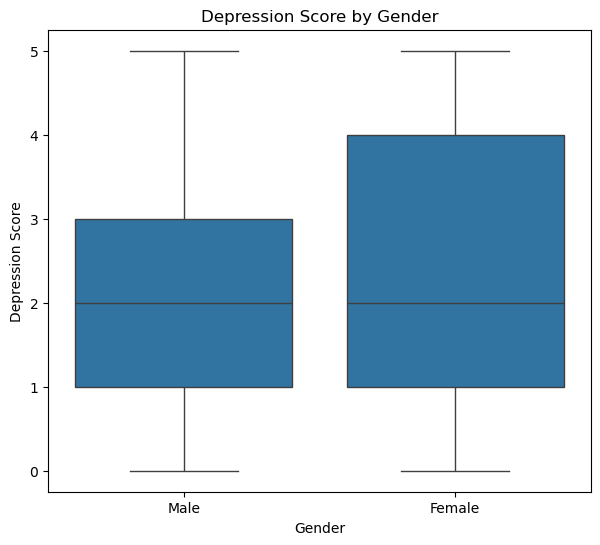

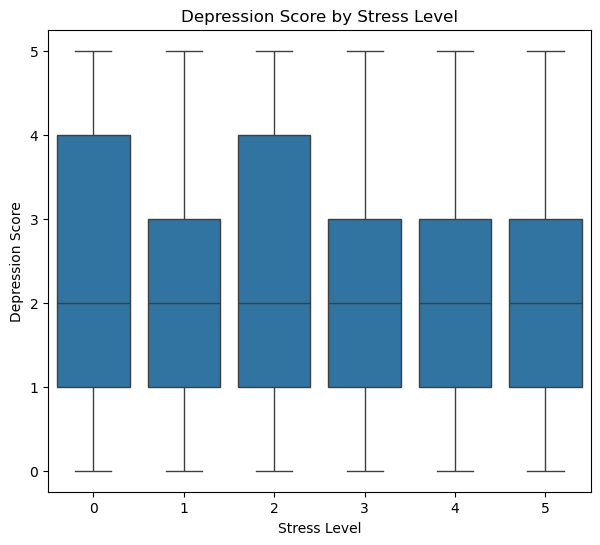

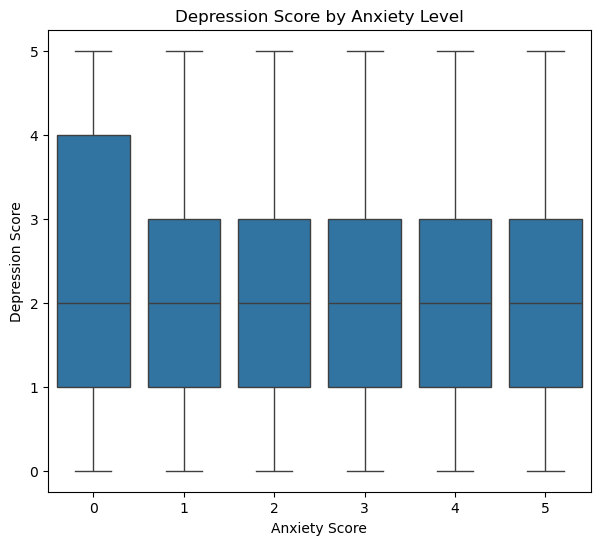

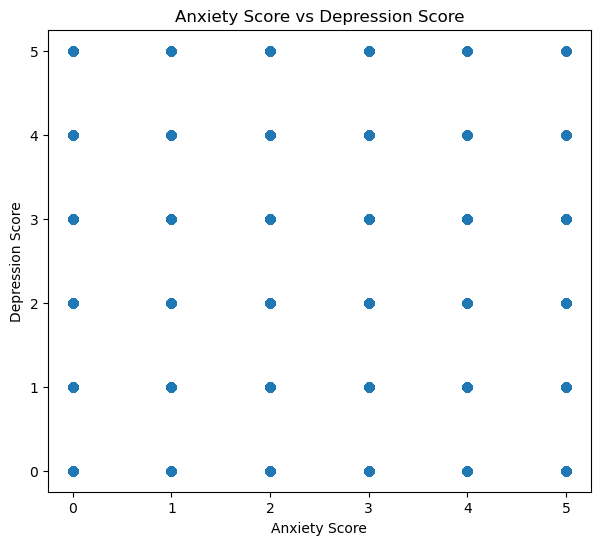

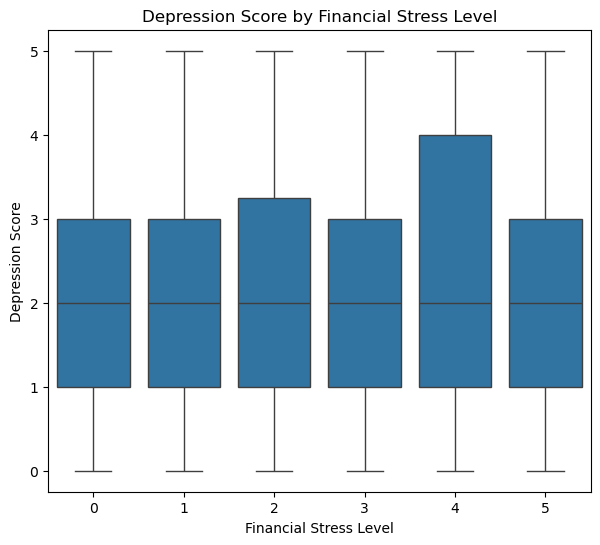

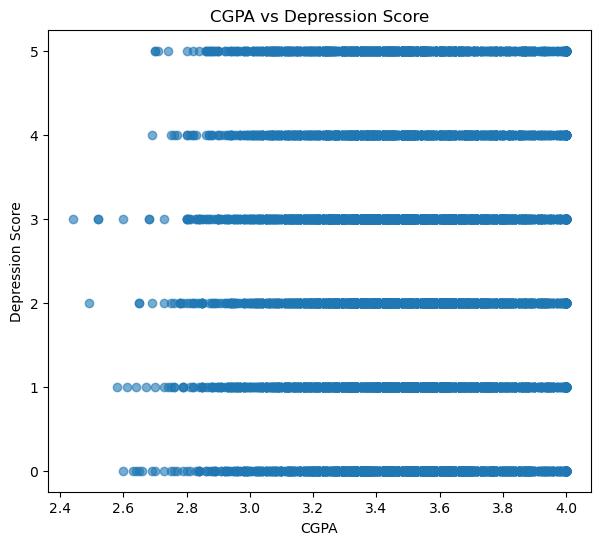

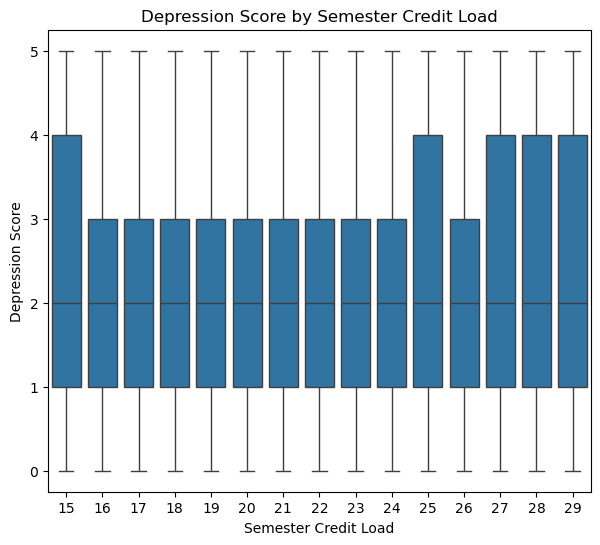

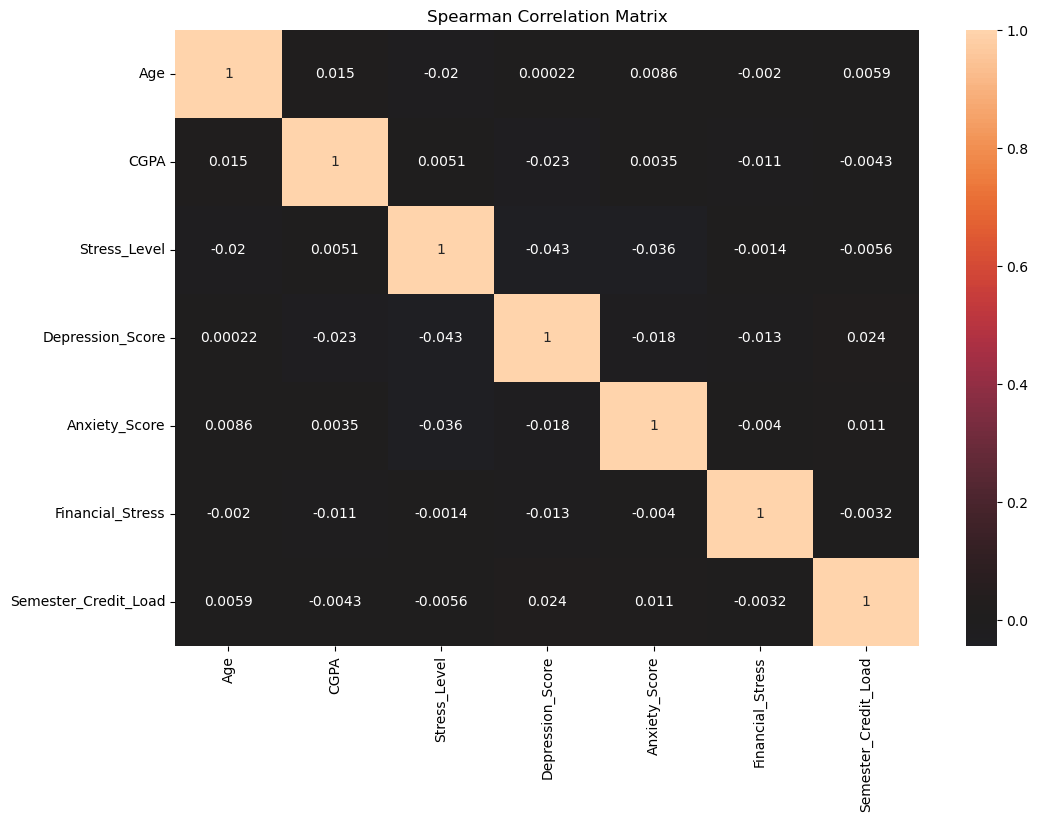

In [ ]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Gender', y='Depression_Score', data=df)
plt.title('Depression Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Depression Score')
plt.show()

plt.figure(figsize=(7,6))
sns.boxplot(
    x='Stress_Level',
    y='Depression_Score',
    data=df,
    order=sorted(df['Stress_Level'].dropna().unique())
)
plt.title('Depression Score by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Depression Score')
plt.show()

plt.figure(figsize=(7,6))
sns.boxplot(
    x='Anxiety_Score',
    y='Depression_Score',
    data=df,
    order=sorted(df['Anxiety_Score'].dropna().unique())
)
plt.title('Depression Score by Anxiety Level')
plt.xlabel('Anxiety Score')
plt.ylabel('Depression Score')
plt.show()

plt.figure(figsize=(7,6))
plt.scatter(
    df['Anxiety_Score'],
    df['Depression_Score'],
    alpha=0.6
)
plt.title('Anxiety Score vs Depression Score')
plt.xlabel('Anxiety Score')
plt.ylabel('Depression Score')
plt.show()

plt.figure(figsize=(7,6))
sns.boxplot(
    x='Financial_Stress',
    y='Depression_Score',
    data=df,
    order=sorted(df['Financial_Stress'].dropna().unique())
)
plt.title('Depression Score by Financial Stress Level')
plt.xlabel('Financial Stress Level')
plt.ylabel('Depression Score')
plt.show()

plt.figure(figsize=(7,6))
plt.scatter(
    df['CGPA'],
    df['Depression_Score'],
    alpha=0.6
)
plt.xlabel('CGPA')
plt.ylabel('Depression Score')
plt.title('CGPA vs Depression Score')
plt.show()

plt.figure(figsize=(7,6))
sns.boxplot(
    x='Semester_Credit_Load',
    y='Depression_Score',
    data=df,
    order=sorted(df['Semester_Credit_Load'].dropna().unique())
)
plt.title('Depression Score by Semester Credit Load')
plt.xlabel('Semester Credit Load')
plt.ylabel('Depression Score')
plt.show()

corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Matrix')
plt.show()


### Analysis: As seen from the box

# 3. Data Preparation

## 3.1 Data Cleaning

In [11]:
# For numeric features, missing values are filled with the median of each column
num_features = df.select_dtypes(include=['number']).columns
df[num_features] = df[num_features].fillna(df[num_features].median())

# For categorical features, missing values are filled with the mode
cat_features = df.select_dtypes(include=['object']).columns
df[cat_features] = df[cat_features].fillna(df[cat_features].mode().iloc[0])

# Check for remaining missing values
df.isna().sum()


Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64

#### Comments: 

## 3.2 Train-Test Split

In [12]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [13]:
## Initialise and train model


# 5. Model Evaluation

In [14]:
## Evaluate model


In [15]:
## New data

## Predict


## Iterative model development


In [16]:
## Further feature engineering / feature selection